In [58]:
#Importing necessary parameters
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt


In [59]:

#Setting up the device agnoistic code
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

#Data Preprocessing 

In [60]:
#Creating the necessary transforms.

mean=np.array([0.485, 0.456, 0.406])
std= np.array([0.229, 0.224, 0.225])

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

In [61]:

#Importing the data
train_data= torchvision.datasets.CIFAR10(root='data',
                                       train=True,
                                       download=True,
                                       transform=train_transform)
test_data= torchvision.datasets.CIFAR10(root='data',
                                      train=False,
                                       download=True,
                                       transform=test_transform)


Files already downloaded and verified
Files already downloaded and verified


In [62]:
len(train_data), len(test_data)

(50000, 10000)

In [63]:
from torch.utils.data import DataLoader
batch_size=64
train_dataloader= DataLoader(dataset= train_data, batch_size=batch_size, shuffle=True)
test_dataloader= DataLoader(dataset= test_data, batch_size=batch_size, shuffle=True)

#Loading the pretrained model 

In [ ]:
model_0= torch.hub.load('pytorch/vision', 'mobilenet_v2', pretrained=True)
print(model_0.classifier)
for param in model_0.parameters():
  param.requires_grad=False
model_0.classifier[1] = torch.nn.Linear(in_features=model_0.classifier[1].in_features, out_features=10) #assigning no of output classes to the last FC layer.
print(model_0.classifier)
model_0.to(device)

#Defining loss and Otimizer

In [65]:
learning_rate=0.001
criterion= nn.CrossEntropyLoss()
optimizer= optim.SGD(model_0.parameters(), lr= learning_rate)

#Accuracy function

In [67]:
#Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred)) * 100
  return acc 


#Train and test function 

In [68]:
test_loss_list=[]
test_acc_list=[]
def test(model):
  test_loss = 0
  test_acc = 0
  #model.eval()
  with torch.inference_mode():
    for batch, (X,y) in enumerate(test_dataloader):
      X,y = X.to(device),y.to(device)
      test_pred= model(X)
      test_loss += criterion(test_pred,y).item()
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
    
  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)
  test_loss_list.append(test_loss)
  test_acc_list.append(test_acc)
  print(f"Test loss :{test_loss:.4f} | test accuraacy: {test_acc:.4f}")
   

In [69]:
train_loss_list = []
def train(model,epochs, batch_size):
  for epoch in range(epochs):
    print(f"Epoch:{epoch}  \n-------")

    train_loss = 0
    train_acc = 0
    for batch, (X,y) in enumerate(train_dataloader):
      X,y = X.to(device),y.to(device)
      model.train()
      y_pred=model(X)
      train_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
      loss= criterion(y_pred,y)
      optimizer.zero_grad()
      train_loss += loss.item()
      loss.backward()
      optimizer.step()

      if batch%1000==0:
        # print(batch)
        
        print(f"Looked at {batch*len(X)}/ {len(train_dataloader.dataset)} samples.")
    
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    train_loss_list.append(train_loss)
    print(f"Train loss :{train_loss:.4f}| train accuraacy: {train_acc:.4f}")
    test(model_0)

#Training the model


In [42]:
# model_0.to(device)
# train(model_0,10,32)


#Recording the time and training

In [ ]:
import timeit

import timeit

elapsed_time = timeit.timeit(lambda: train(model_0, 10, 32), number=1)
print("Elapsed time:", elapsed_time)


#Plotting the Output

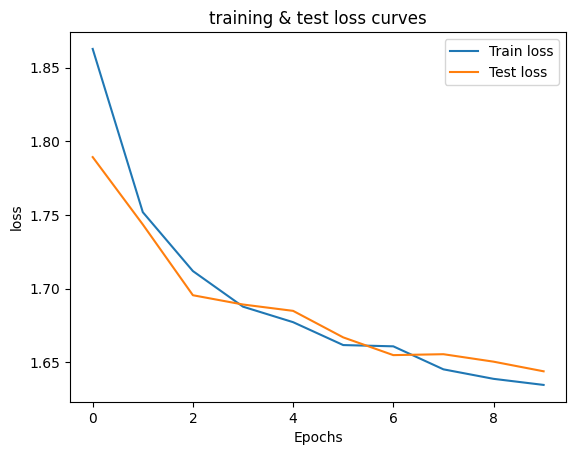

In [ ]:
import numpy as np

epoch_list= [i for i in range(10)]
#plot loss curves
plt.plot(epoch_list, train_loss_list, label ='Train loss')
plt.plot(epoch_list, test_loss_list, label='Test loss')
plt.title("training & test loss curves")
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend();


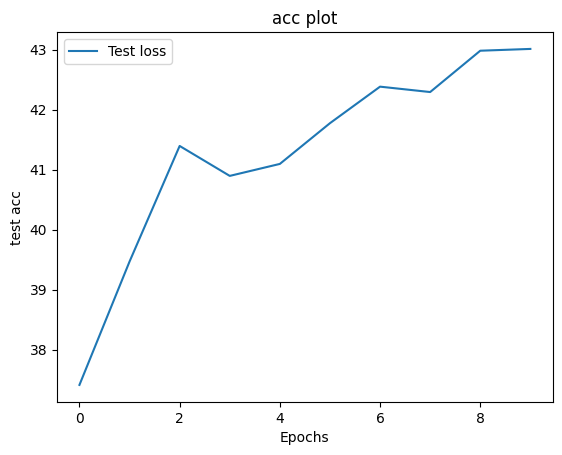

In [ ]:
#plot accuracy
#plt.plot(epoch_list, train_loss_list, label ='Train loss')
plt.plot(epoch_list, test_acc_list, label='Test loss')
plt.title("acc plot")
plt.ylabel("test acc")
plt.xlabel('Epochs')
plt.legend();

#Now changing the hyperparameter

In [70]:
learning_rate=0.01
criterion= nn.CrossEntropyLoss()
optimizer= optim.SGD(model_0.parameters(), lr= learning_rate)

elapsed_time = timeit.timeit(lambda: train(model_0, 10, 64), number=1)
print("Elapsed time:", elapsed_time)

Epoch:0  
-------
Looked at 0/ 50000 samples.
Train loss :1.7821| train accuraacy: 37.6479
Test loss :1.6866 | test accuraacy: 42.0283
Epoch:1  
-------
Looked at 0/ 50000 samples.
Train loss :1.6507| train accuraacy: 42.6690
Test loss :1.6790 | test accuraacy: 41.3515
Epoch:2  
-------
Looked at 0/ 50000 samples.
Train loss :1.6240| train accuraacy: 43.3064
Test loss :1.6846 | test accuraacy: 42.5458
Epoch:3  
-------
Looked at 0/ 50000 samples.
Train loss :1.6131| train accuraacy: 43.9398
Test loss :1.6895 | test accuraacy: 42.0780
Epoch:4  
-------
Looked at 0/ 50000 samples.
Train loss :1.6069| train accuraacy: 44.2755
Test loss :1.6458 | test accuraacy: 42.8145
Epoch:5  
-------
Looked at 0/ 50000 samples.
Train loss :1.6078| train accuraacy: 44.0117
Test loss :1.6690 | test accuraacy: 42.7747
Epoch:6  
-------
Looked at 0/ 50000 samples.
Train loss :1.6023| train accuraacy: 44.0397
Test loss :1.6839 | test accuraacy: 42.0581
Epoch:7  
-------
Looked at 0/ 50000 samples.
Train los

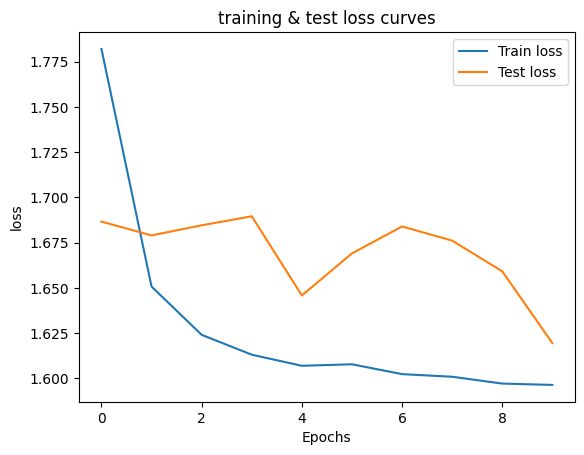

In [71]:
import numpy as np

epoch_list= [i for i in range(10)]
#plot loss curves
plt.plot(epoch_list, train_loss_list, label ='Train loss')
plt.plot(epoch_list, test_loss_list, label='Test loss')
plt.title("training & test loss curves")
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend();


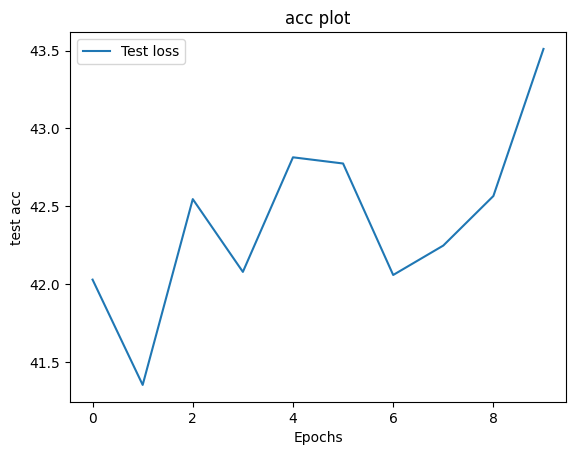

In [72]:
#plot accuracy
#plt.plot(epoch_list, train_loss_list, label ='Train loss')
plt.plot(epoch_list, test_acc_list, label='Test loss')
plt.title("acc plot")
plt.ylabel("test acc")
plt.xlabel('Epochs')
plt.legend();